In [1]:
import os
import robosteer12idb.data as du
import torch
import numpy as np
from matplotlib import pyplot as plt
import random

In [2]:
dataset_path = '../../Data/robo_steer/raw'

In [3]:
user_counts = {}
for user_path in os.listdir(dataset_path):
    user_counts[user_path] = len(list(os.listdir(os.path.join(dataset_path, user_path, 'Scans'))))

In [4]:
for user in user_counts.keys():
    print(f'{user} {user_counts[user]}')

Mengel 2
zuoSep21 1
Leal2 66
tLiSep25 60
Macfarlane 202
yRen 8
Wang_Wenjie 156
Schaefer 35
gJohnson 32
fZhang 62
BioSAXS 18
Srivastava 67
WangOct14 2
Thomas 15
CLi 11
Driscoll 61
Mengel2 6
Kuzmenko_Oct12 48
Chaney 33
Kuzmenko_Oct11 31
yHu1 4
Mahanthappa 40


In [5]:
scan_list = du.get_all_data_fp('../../Data/robo_steer/raw')

In [6]:
pos_starts = []
pos_ranges = []
read_starts = []
read_ranges = []
num_readings = []
scans = []
for scan_fp in scan_list:
    scan = du.read_pos_dat(scan_fp)
    if len(scan.pos) > 1:
        scans.append(scan)
        pos_starts.append(scan.pos[0])
        pos_ranges.append(np.max(scan.pos) - np.min(scan.pos))
        read_starts.append(scan.reads[0])
        read_ranges.append(np.max(scan.reads) - np.min(scan.reads))
        num_readings.append(len(scan.pos))

(array([ 32., 168., 618.,  49.,  80.,   0.,   0.,   0.,   0.,   2.]),
 array([ 0.099 ,  2.2893,  4.4796,  6.6699,  8.8602, 11.0505, 13.2408,
        15.4311, 17.6214, 19.8117, 22.002 ]),
 <BarContainer object of 10 artists>)

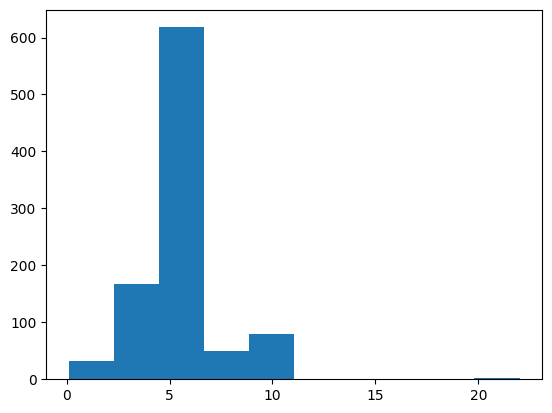

In [7]:
plt.hist(pos_ranges)

In [8]:
new_scan = du.rescale_scan(scan, 200)

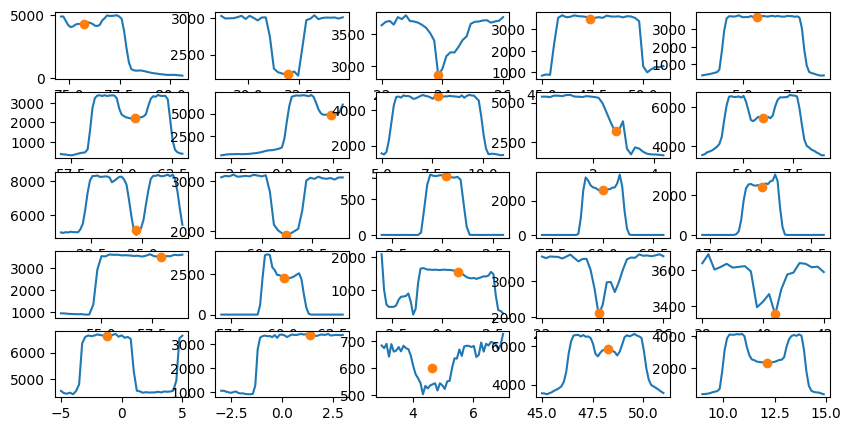

In [9]:
fig, axs = plt.subplots(5, 5)
fig.set_size_inches(10, 5)
random.shuffle(scans)
i = 0
for row in axs:
    for ax in row:
        scan = scans[i]
        i += 1
        ax.plot(scan.pos, scan.reads)
        ax.plot(scan.usr_pos, scan.usr_read, marker='o')

In [10]:
rescaled_scans = [du.rescale_scan(scan, 200) for scan in scans]

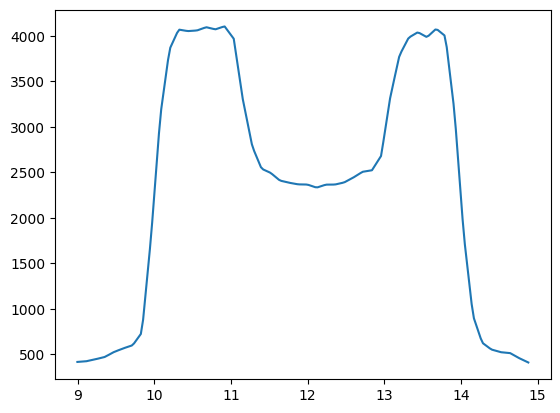

In [11]:
pos_interp = np.linspace(scan.pos[0], scan.pos[-1], 200)
read_interp = np.interp(pos_interp, scan.pos, scan.reads)
plt.plot(pos_interp, read_interp)
#plt.plot(scan.pos, scan.reads)

In [12]:
print(rescaled_scans[0].pos)

[-1.         -0.98994975 -0.9798995  -0.96984925 -0.95979899 -0.94974874
 -0.93969849 -0.92964824 -0.91959799 -0.90954774 -0.89949749 -0.88944724
 -0.87939698 -0.86934673 -0.85929648 -0.84924623 -0.83919598 -0.82914573
 -0.81909548 -0.80904523 -0.79899497 -0.78894472 -0.77889447 -0.76884422
 -0.75879397 -0.74874372 -0.73869347 -0.72864322 -0.71859296 -0.70854271
 -0.69849246 -0.68844221 -0.67839196 -0.66834171 -0.65829146 -0.64824121
 -0.63819095 -0.6281407  -0.61809045 -0.6080402  -0.59798995 -0.5879397
 -0.57788945 -0.5678392  -0.55778894 -0.54773869 -0.53768844 -0.52763819
 -0.51758794 -0.50753769 -0.49748744 -0.48743719 -0.47738693 -0.46733668
 -0.45728643 -0.44723618 -0.43718593 -0.42713568 -0.41708543 -0.40703518
 -0.39698492 -0.38693467 -0.37688442 -0.36683417 -0.35678392 -0.34673367
 -0.33668342 -0.32663317 -0.31658291 -0.30653266 -0.29648241 -0.28643216
 -0.27638191 -0.26633166 -0.25628141 -0.24623116 -0.2361809  -0.22613065
 -0.2160804  -0.20603015 -0.1959799  -0.18592965 -0.

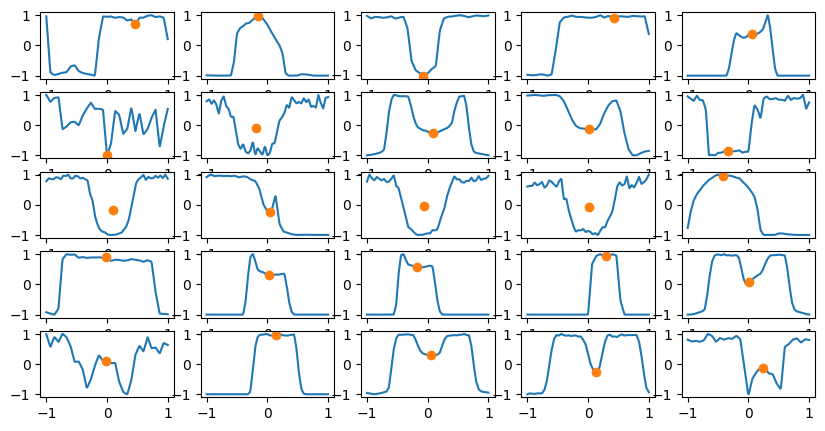

In [14]:
fig, axs = plt.subplots(5, 5)
fig.set_size_inches(10, 5)
random.shuffle(rescaled_scans)
i = 0
for row in axs:
    for ax in row:
        scan = rescaled_scans[i]
        i += 1
        ax.plot(scan.pos, scan.reads)
        ax.plot(scan.usr_pos, scan.usr_read, marker='o')